<center><img alt="PL logo" width="14%" src="https://drive.google.com/uc?export=view&id=16u80e7eYSzShEFS2k96Bmj2BxCiE9hCT">

#### **PEDRO SANCHES** DATA SCIENCE

---

# **Rio de Janeiro ou Cape Town?**
## Análise de Dados do Airbnb </center>

Em 2011, fui morar no Rio de Janeiro. A cidade maravilhosa me acolheu (muito bem, obrigado!) durante 3 intensos anos. Algum tempo depois, em 2019, fiz minha primeira (e única, por enquanto) viagem internacional. O destino foi Cape Town na África do Sul.

**Mas, o que esses dois lugares têm em comum?**

Além das experiências maravilhosas e paisagens deslumbrantes, esses destinos **impactaram absurdamente a minha vida**. O resultado disso é muito saudosismo e promessas constantes de retorno.

Enquanto isso não acontece, decidi analisar alguns dados do [Airbnb](https://www.airbnb.com.br/), a fim de avaliar qual destino seria financeiramente mais adequado, em termos de hospedagem, para uma **possível viagem pós-pandemia**.

<center><img alt="Analisando Airbnb" width="20%" src="https://pbs.twimg.com/profile_images/798945041930711040/2VznE7Db_400x400.jpg"></center>


Pois bem, não é nenhuma novidade que o Airbnb já é a **maior empresa hoteleira da atualidade**. Detalhe, **sem possuir nenhum hotel**. Pergunta lá pro Ifood se eles têm algum restaurante. *Think outside the box*, meus amigos!

Uma iniciativa (muito bacana) do Airbnb é disponibilizar dados hoteleiros de algumas das principais cidades do mundo. Através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste mini projeto, faremos uma rápida análise dos dados referentes às cidades do Rio de Janeiro e Cape Town, ver quais insights podem ser extraídos a partir de dados brutos e definir qual o próximo destino deste que vos fala/escreve/digita.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas os seguintes arquivos:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*
* `listings.csv` - *Summary information and metrics for listings in Cape Town (good for visualisations).*

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [ ]:
# importar os arquivo listings.csv de cada cidade para seu respectivo DataFrame
df_rj = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-03-21/visualisations/listings.csv")
df_cp = pd.read_csv("http://data.insideairbnb.com/south-africa/wc/cape-town/2021-03-25/visualisations/listings.csv")

## Análise dos Dados

Antes de qualquer tipo de análise, precisamos conhecer nossas variáveis e saber sobre o que estamos trantando.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

### **Quantas variáveis e quantas entradas o nosso conjunto de dados possui? Quais os tipos dessas variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de variável em cada coluna.

Este *dataset* é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`, é disponibilizada uma versão mais completa com mais de 3 mil entradas e mais de 100 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
# Rio de Janeiro
print("Entradas RJ:\t {}".format(df_rj.shape[0]))
print("Variáveis RJ:\t {}\n".format(df_rj.shape[1]))

# Cape Town
print("Entradas CP:\t {}".format(df_cp.shape[0]))
print("Variáveis CP:\t {}\n".format(df_cp.shape[1]))

# verificar o tipo de cada variável
display(df_rj.dtypes)

Entradas RJ:	 26628
Variáveis RJ:	 16

Entradas CP:	 19052
Variáveis CP:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [ ]:
# Valores ausentes em ordem decrescente para o Rio de Janeiro
(df_rj.isnull().sum() / df_rj.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.373329
last_review                       0.373329
host_name                         0.027039
name                              0.001089
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

In [ ]:
# Valores ausentes em ordem decrescente para Cape Town
(df_cp.isnull().sum() / df_cp.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.278029
last_review                       0.278029
host_name                         0.026139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

Para o conjunto de dados das duas cidades, podemos verificar que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.

Logo, se deletarmos esta coluna nada será alterado. É o que faremos mais adiante.

### **Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma para cada cidade.

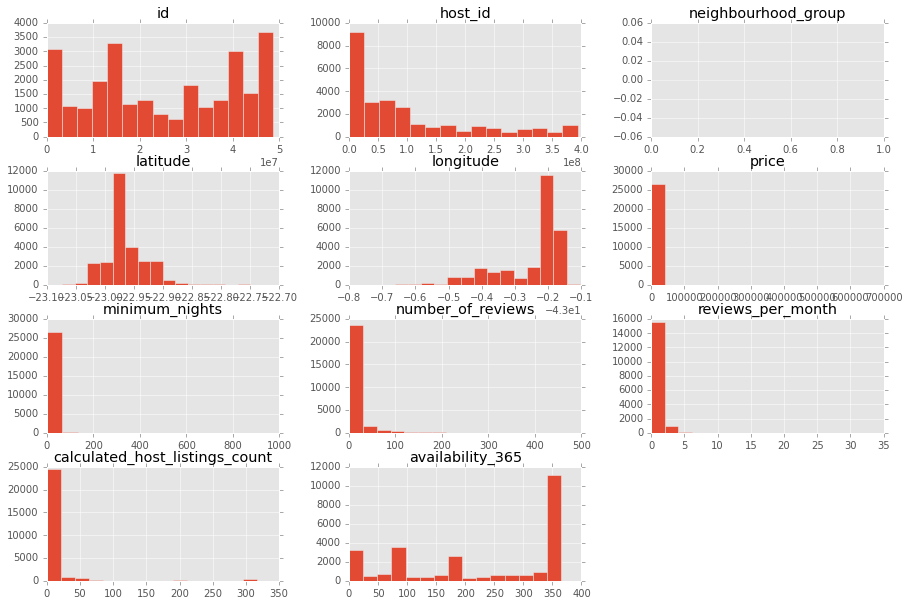

In [ ]:
# RIO DE JANEIRO - histograma das variáveis numéricas
df_rj.hist(bins=15, figsize=(15,10));

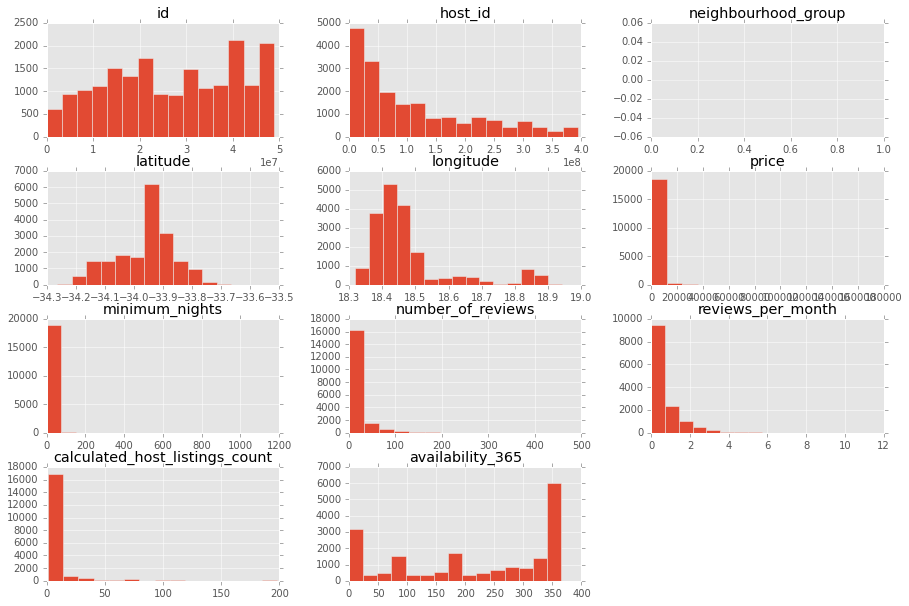

In [ ]:
# CAPE TOWN - histograma das variáveis numéricas
df_cp.hist(bins=15, figsize=(15,10));

### **Há *outliers* presentes no dataset?**

Pela distribuição do histogramas, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*.

São elas:

* Resumo estatístico por meio do método `describe()`.
* Plotar `boxplots` para a variável.

Vamos às análises:

In [ ]:
# primeiro, verificamos o resumo estatístico das variáveis numéricas do RIO DE JANEIRO
df_rj[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26628.000000,26628.000000,26628.000000,16687.000000,26628.000000,26628.000000
mean,749.774148,4.749624,12.219543,0.611649,10.021481,226.596853
std,5636.368450,19.116195,29.876552,0.860417,38.697792,138.216789
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.090000,1.000000,89.000000
50%,264.000000,2.000000,2.000000,0.270000,1.000000,266.000000
75%,536.000000,4.000000,9.000000,0.810000,3.000000,364.000000
max,629236.000000,1000.000000,447.000000,30.650000,316.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses sobre os dados do Rio de Janeiro, como:

* A variável `price` possui 75% do valor abaixo de 536, porém seu valor máximo é de 629236,00 reais.
* A quantidade mínima de noites (`minimum_nights`) chega a 1000, quase 3 anos.

Esses valores ocorrem devido a erros de digitação ou aferição dos dados.

In [ ]:
# depois, verificamos o resumo estatístico das variáveis numéricas de CAPE TOWN
df_cp[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19052.000000,19052.000000,19052.000000,13755.000000,19052.000000,19052.000000
mean,2362.957695,4.455910,16.013279,0.686401,8.960844,214.982312
std,6164.193940,18.815331,32.216318,0.880878,24.854693,137.598726
min,122.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,650.000000,1.000000,0.000000,0.120000,1.000000,87.000000
50%,1060.000000,2.000000,3.000000,0.350000,2.000000,249.000000
75%,2100.000000,3.000000,16.000000,0.920000,5.000000,356.000000
max,180000.000000,1124.000000,488.000000,10.670000,198.000000,365.000000


Olhando o resumo estatístico para CAPE TOWN, podemos, da mesma forma, observar que:

* A variável `price` possui 75% do valor abaixo de 2100 rands (equivalente a 714 reais), porém seu valor máximo é 180000 rands (61200 reais).
* A quantidade mínima de noites (`minimum_nights`) chega a 1124, mais de 3 anos. 

#### Boxplot para minimum_nights

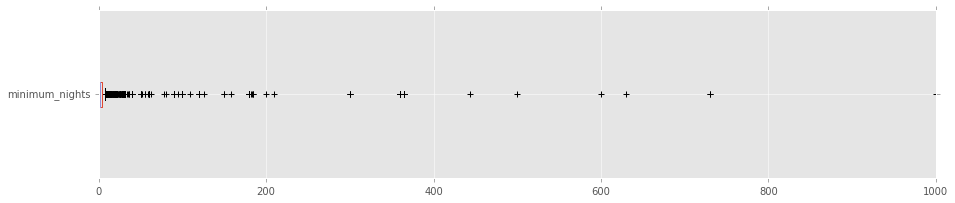

minimum_nights: valores acima de 30:
213 entradas
0.7999%


In [ ]:
# minimum_nights para o Rio de Janeiro
df_rj.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df_rj[df_rj.minimum_nights > 30])))
print("{:.4f}%".format((len(df_rj[df_rj.minimum_nights > 30]) / df_rj.shape[0])*100))

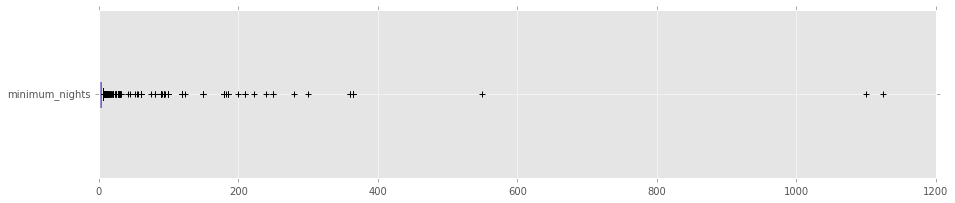

minimum_nights: valores acima de 30:
159 entradas
0.8346%


In [ ]:
# minimum_nights para Cape Town
df_cp.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df_cp[df_cp.minimum_nights > 30])))
print("{:.4f}%".format((len(df_cp[df_cp.minimum_nights > 30]) / df_cp.shape[0])*100))

### Boxplot para price

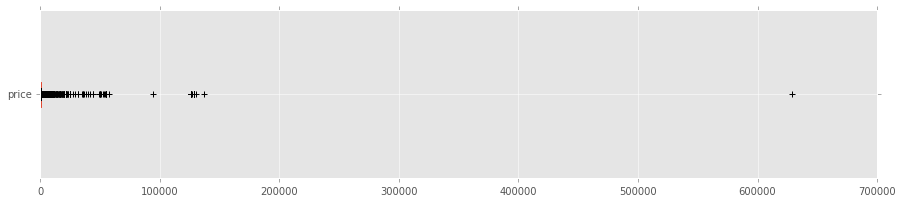


price: valores acima de 1500 reais
1774 entradas
6.6622%


In [ ]:
# price
df_rj.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 reais para price
print("\nprice: valores acima de 1500 reais")
print("{} entradas".format(len(df_rj[df_rj.price > 1500])))
print("{:.4f}%".format((len(df_rj[df_rj.price > 1500]) / df_rj.shape[0])*100))

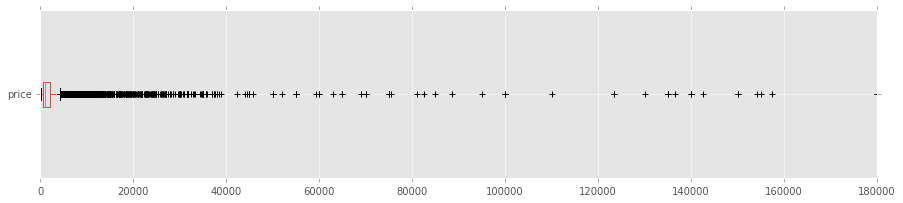


price: valores acima de 4400 rands (equivalente a 1500 reais)
2072 entradas
10.8755%


In [ ]:
# price
df_cp.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 4400 rands para price
print("\nprice: valores acima de 4400 rands (equivalente a 1500 reais)")
print("{} entradas".format(len(df_cp[df_cp.price > 4400])))
print("{:.4f}%".format((len(df_cp[df_cp.price > 4400]) / df_cp.shape[0])*100))

### Histogramas sem *Outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

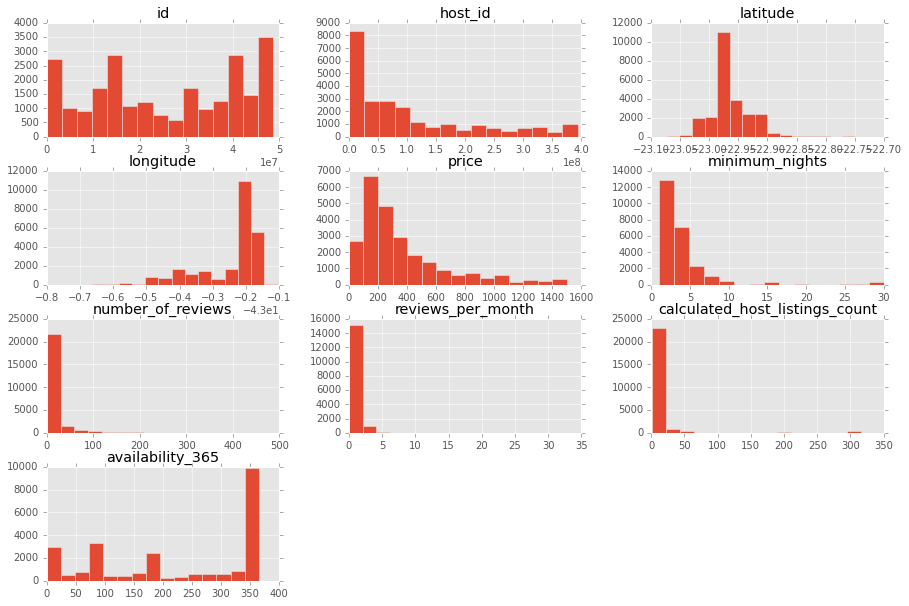

In [ ]:
# remover os *outliers* em um novo DataFrame para o RIO DE JANEIRO
rj_clean = df_rj.copy()
rj_clean.drop(rj_clean[rj_clean.price > 1500].index, axis=0, inplace=True)
rj_clean.drop(rj_clean[rj_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
rj_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
rj_clean.hist(bins=15, figsize=(15,10));

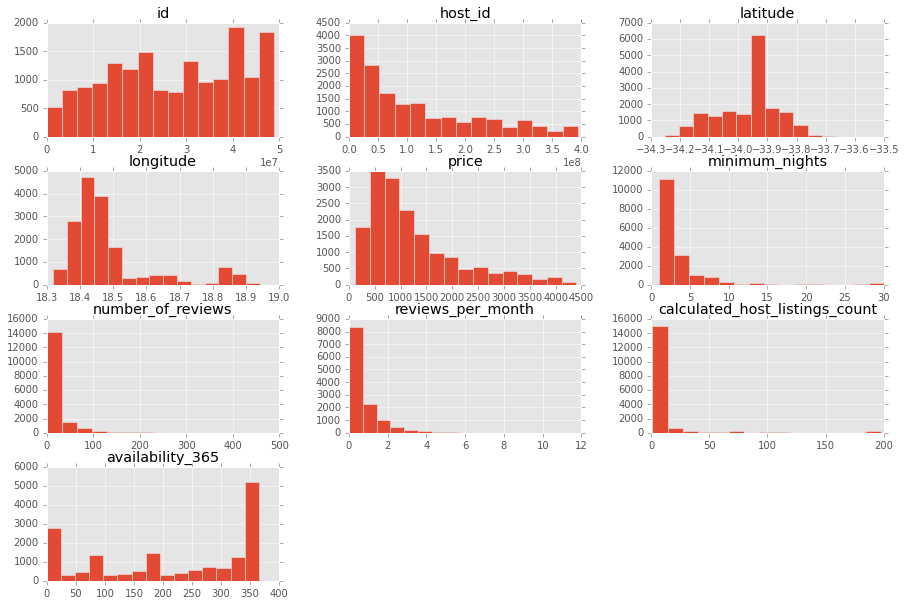

In [ ]:
# remover os *outliers* em um novo DataFrame para CAPE TOWN
cp_clean = df_cp.copy()
cp_clean.drop(cp_clean[cp_clean.price > 4400].index, axis=0, inplace=True)
cp_clean.drop(cp_clean[cp_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
cp_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
cp_clean.hist(bins=15, figsize=(15,10));

### **Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
rj_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vista Alegre        1309.000000
Cavalcanti           925.000000
Vaz Lobo             838.500000
Realengo             794.000000
Freguesia (Ilha)     761.500000
Osvaldo Cruz         622.250000
Inhoaíba             562.250000
Cacuia               560.000000
Manguinhos           560.000000
Grumari              536.333333
Name: price, dtype: float64

In [ ]:
# ver preços por bairros, na média
cp_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Ward 40     4000.000000
Ward 74     1677.342377
Ward 69     1657.806647
Ward 54     1638.515723
Ward 14     1601.054054
Ward 71     1569.163090
Ward 28     1540.000000
Ward 61     1535.710027
Ward 62     1531.611386
Ward 100    1347.888554
Name: price, dtype: float64

Podemos observar que nenhum dos famosos endereços do RJ apareceram na lista do Top 10. Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Um bom exemplo de como uma amostra pode ser não-representativa.

Mas, seguindo a minha pesquisa e sabendo que o Leblon é uma boa pedida para quem está indo ao Rio de Janeiro, farei minha análise para esta região.

In [ ]:
# ver quantidade de imóveis na região desejada
print(rj_clean[rj_clean.neighbourhood == "Leblon"].shape)
rj_clean[rj_clean.neighbourhood == "Leblon"]

(1074, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26,86670,AMAZING VIEW ON THE LEBLON/IPANEMA BOARDER.,474221,June,Leblon,-22.98361,-43.21827,Entire home/apt,264,2,83,2021-02-05,0.71,7,255
32,89454,Charm with a great location Leblon,487000,Patricia,Leblon,-22.98668,-43.22171,Entire home/apt,390,2,33,2020-02-16,0.32,3,363
62,137002,"Na Cupertino, muito sofisticado no centro do L...",635510,Gilberto,Leblon,-22.98251,-43.22108,Entire home/apt,792,2,19,2021-01-25,0.16,5,305
63,137048,Charming 2 bedroom flat in Leblon,670198,Clarisse,Leblon,-22.98002,-43.22371,Entire home/apt,180,3,33,2020-11-10,0.29,1,350
143,273496,Luxury Accommodation in Hip Leblon,4022675,Thea & Gui,Leblon,-22.98338,-43.22332,Entire home/apt,524,3,52,2021-02-17,0.46,1,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26520,48626996,All in Rio 2 bedroom apartment for families 35...,371026651,Pineapples Super Conta,Leblon,-22.98526,-43.22361,Entire home/apt,306,1,0,NaN,NaN,316,358
26532,48648710,"Sofá, banheiro dividido , excelente localização",337817826,Roberta,Leblon,-22.98010,-43.22521,Shared room,75,1,0,NaN,NaN,2,0
26567,48691523,"Cozy apartment, 1 block from Leblon beach",27471621,Bruna,Leblon,-22.98474,-43.22546,Entire home/apt,400,1,0,NaN,NaN,1,156
26589,48709092,Apartamento no Quadrado do Leblon,15307784,Carol,Leblon,-22.98489,-43.22355,Entire home/apt,600,2,0,NaN,NaN,1,361


Já para Cape Town, selecionei a maravilhosa região de Sea Point (Ward 54) para análise dos dados.

In [ ]:
# ver quantidade de imóveis na região desejada
print(cp_clean[cp_clean.neighbourhood == "Ward 54"].shape)
cp_clean[cp_clean.neighbourhood == "Ward 54"]

(1749, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
41,82212,Perfect Beachfront Apartment,404176,Gayle,Ward 54,-33.91788,18.38626,Entire home/apt,1429,3,29,2020-12-23,0.25,7,285
55,255987,"Bellevue Manor Guest House, SEA POINT, CAPE TOWN",1345936,Gary,Ward 54,-33.91478,18.39179,Private room,884,1,27,2020-03-12,0.72,6,365
62,282586,Cottage de la Mer with Private Terrace and Dre...,1384294,Patrick V.,Ward 54,-33.92659,18.38326,Entire home/apt,1944,3,24,2021-02-16,0.32,1,344
71,357993,Beach View Studio with Balcony Walkout,1811942,Shannon,Ward 54,-33.96296,18.37931,Entire home/apt,1371,2,102,2021-03-08,1.18,3,204
75,390198,Fabulous views,1952066,Rita,Ward 54,-33.91239,18.39080,Private room,486,4,48,2021-01-05,0.44,2,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18926,48554663,Barry Hall Apartments No 4,116021380,Rita,Ward 54,-33.91811,18.38919,Private room,1763,1,0,NaN,NaN,5,342
18927,48554666,Garden Cottage,116021380,Rita,Ward 54,-33.91845,18.38770,Private room,1261,1,0,NaN,NaN,5,288
18998,48724698,Oceantide Penthouse on London rd in Sea Point,3886732,Koos,Ward 54,-33.91190,18.39132,Entire home/apt,1537,1,0,NaN,NaN,69,239
19002,48734297,Magical 2 bed flat with beautiful mountain views,76574144,Louise,Ward 54,-33.91298,18.39098,Entire home/apt,1250,2,0,NaN,NaN,4,83


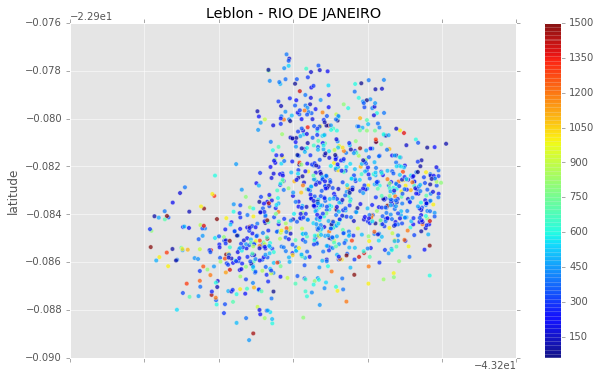

In [ ]:
# plotar os imóveis pela latitude-longitude
rj_pt = rj_clean[rj_clean.neighbourhood == "Leblon"];
rj_pt.plot(title="Leblon - RIO DE JANEIRO",kind="scatter", x='longitude', y='latitude', alpha=0.7, c=rj_pt['price'], s=20,
              cmap=plt.get_cmap('jet'), figsize=(10,6));

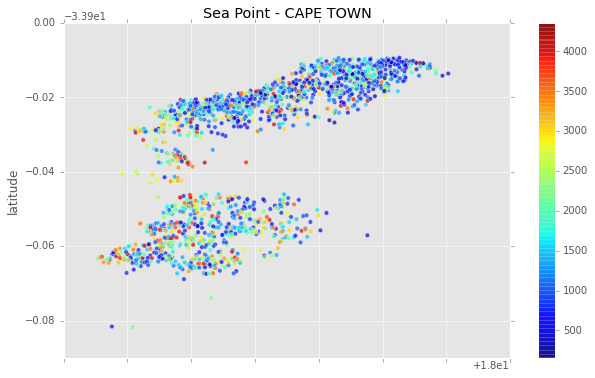

In [ ]:
# plotar os imóveis pela latitude-longitude
cp_pt = cp_clean[cp_clean.neighbourhood == "Ward 54"];
cp_pt.plot(title="Sea Point - CAPE TOWN", kind="scatter", x='longitude', y='latitude', alpha=0.7, c=cp_pt['price'], s=20,
              cmap=plt.get_cmap('jet'), figsize=(10,6));

### **Qual é a média de preços por noite para as duas cidades?**

RIO DE JANEIRO

In [ ]:
# ver a média da coluna `minimum_nights``
print('Média de Preço por diária: \t', round(rj_pt.price.mean()/rj_pt.minimum_nights.mean()),'reais')

Média de Preço por diária: 	 143 reais


CAPE TOWN

In [ ]:
# ver a média da coluna `minimum_nights``
print('Média de Preço por diária: \t',  round(cp_pt.price.mean()*0.34/cp_pt.minimum_nights.mean()),'reais')

Média de Preço por diária: 	 170 reais


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também notou-se que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

No entanto, a análise foi suficiente para o objetivo inicial, que era a definição da melhor hospedagem para o meu bolso. Dessa forma, dadas as médias de preço bem próximas, não consegui definir nada =D.

Enfim, a análise dos dados da AZUL é o próximo passo kkk

Abraço!